<p> 
 <h3> 
     Author: Swapnil Acharya
</h3>
 <br>   
<h5> This notebook is the third version. This notebook uses the working parts from version 1, which had several error and trials </h5> </p>

 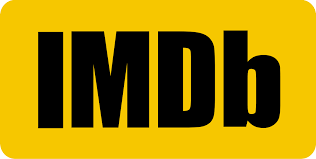 
# SENTIMENT ANALYSIS OF MOVIEW REVIEW From IMDB
## USING  Classical Machine Learning Models and Ensemble of Classical Machine Learning Models 

On a daily basis, billions of text data that express sentiment are
generated on the internet through social media and the entertainment industry.
Analyzing how a customer feels about a drama, tv series and movies are really
important to the entertainment industry. For instance, in case of movies, a movie
production company may need to know how customers feel about their movie. This
evaluation could be done through criteria such as was the movie good or bad, were
there parts of the movie that were good or bad, did the actors perform good or bad
and several other criteria. One way to evaluate these criteria would be through the
movie reviews left by customers. These reviews could be used to analyze the criteria
mentioned earlier. This analysis could be used to make changes in future movies
such as selecting an actor for a particular genre of movie, which part of movie should
be used for movie previews to attract people. This eventually will lead to increased
revenue for movie production companies. Thus the extreme need for Sentiment
analysis on movie review. The most popular platform today where people leave
movies reviews is IMDB. This project will analyze IMDB movie reviews and in a
broader sense will analyze whether a review for a movie is positive or negative. The
basic steps involve data mining and then training a machine learning model to
recognize whether a given movie’s review is positive or negative. Then the model
can predict whether a given review was positive or negative

## Task1: Load Data

In [1]:
import pandas as pd #for data container

In [2]:
raw_reviews_df = pd.read_csv("imdb_reviews.csv") #read from csv file

In [3]:
raw_reviews_df.shape #view dimensions of the pandas daframe

(50000, 2)

In [4]:
raw_reviews_df.iloc[0:1] #view one movie review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [5]:
raw_reviews_df.info() #vew information abot Daframe in general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Task2: Preprocess Data

In [6]:
from matplotlib import pyplot as plt#to plot histogram

Text(0, 0.5, 'Number of samples')

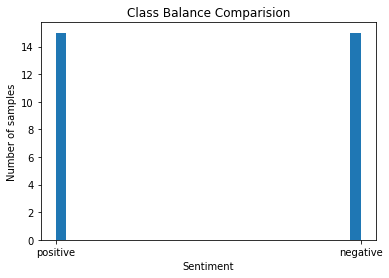

In [7]:
plt.hist(raw_reviews_df["sentiment"],density=True,bins=30)
plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of samples")

In [8]:
print("Total Samples for Positive Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"]))
print("Total Samples for Negative Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"]))

Total Samples for Positive Sentiments:  25000
Total Samples for Negative Sentiments:  25000


In [9]:
print("Total Samples which do not have reviews: ",len(raw_reviews_df[raw_reviews_df["review"]==None]))

Total Samples which do not have reviews:  0


In [10]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud #library that allows word cloud to be generated

def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    #sentences_single_string = " ".join(sentences_list)
    sentences_single_string = " ".join(map(str,sentences_list))
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

In [11]:
import time

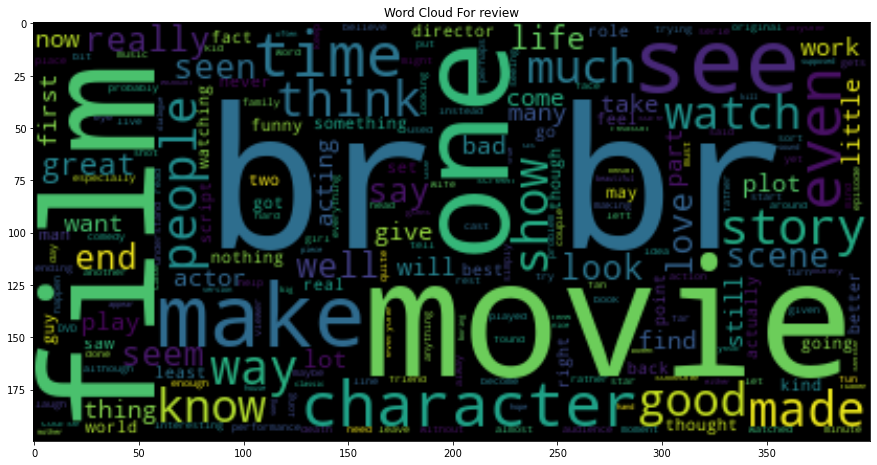

Total Time Taken: 44354.2275428772 ms


In [12]:
tic= time.time()
generate_word_cloud(raw_reviews_df,"review",background_color="black")
toc = time.time()
diff = 1000*(toc - tic)
print("Total Time Taken: " + str(diff) + " ms")

### Task 3: Text Preprocessing

In [13]:
#import required libraries
from nltk.corpus import stopwords #for stopwords
from nltk.stem import PorterStemmer #for word stemming
from nltk.tokenize import TweetTokenizer #for toekinizing string to list of words
import string #for punctuation
import re #for regular expression
import numpy as np

In [262]:
def process_string(text):
    """This function returns a processed list of words from the given text
    
    This function removes html elements and urls using regular expression, then
    converts string to list of workds, them find the stem of words in the list of words and
    finally removes stopwords and punctuation marks from list of words.
    
    Args:
        text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
    Returns:
        clean_text(string): A text formed after text preprocessing.
    """
    
    #remove any urls from the text
    text = re.sub(r"https:\/.*[\r\n]*","",text)
    
    #remove any html elements from the text
    text = re.sub(r"<[\w]*[\s]*/>","",text)
    
    #remove prediods  marks
    text = re.sub(r"[\.]*","",text)
    
    #initilze tweet tokenizer 
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    
    #tokenize text
    text_tokens = tokenizer.tokenize(text)
    
    #intizlize porter stemmer
    porter_stemmer = PorterStemmer()
    
    #get english stopwords
    english_stopwords = stopwords.words("english")
    
    cleaned_text_tokens = [] # a list to hold cleaned text tokens
    
    for word in text_tokens:
        if((word not in english_stopwords) and #remove stopwords
            (word not in string.punctuation)): #remove punctuation marks
                
                stemmed_word = porter_stemmer.stem(word) #get stem of the current word
                cleaned_text_tokens.append(stemmed_word) #appened stemmed word to list of cleaned list
    
    #combine list into single string
    clean_text = " ".join(cleaned_text_tokens)
    
    return clean_text

In [15]:
raw_reviews_df["review"].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [16]:
process_string(raw_reviews_df["review"].iloc[0])

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<p> <h5> clearly this cleaned review is free of html tags as well now. Lets apply this new text cleaning method to all 50k reviews </h5> </p>

In [17]:
#raw_reviews_df["review"] = raw_reviews_df["review"].apply(process_string)

In [18]:
#save processed reviews for future use
#save file to csv
#raw_review_df.to_csv("imdb_reviews_cleaned_v2.csv"

In [19]:
raw_reviews_df = pd.read_csv("imdb_reviews_cleaned_v2.csv")

In [20]:
raw_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   review      49999 non-null  object
 2   sentiment   50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [21]:
raw_reviews_df["review"].iloc[0]

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<p> <h5>
Lets look at reviews after they have been cleaned
</h5> </p>

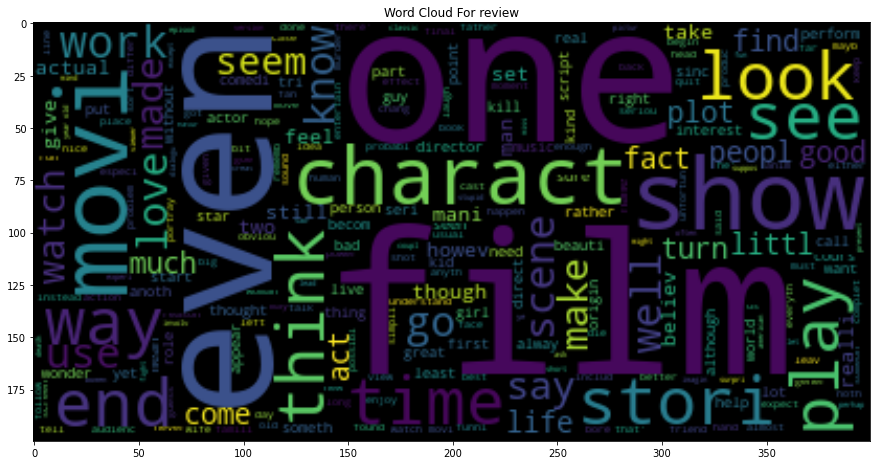

Total Time Taken: 44.34061551094055 ms


In [22]:
tic = time.time()
generate_word_cloud(raw_reviews_df,"review",background_color="black")
toc = time.time()
diff = toc - tic
print("Total Time Taken: " + str(diff) + " ms")

<p> <h5> 
Clearly the new text preprocessing method resulted in much more cleaner reviews, the prominent "br" tag that has massive occurence is not visible anymore. Thanks to regular epression. Lets further examine these word could by looking into positive only and negative only reviews </h5> </p>

<p> <h5> The review have been saved and loaded.</h5> </p>

### Task 4: Split Data into Train and Test Set

<p> <h5>
The data set has to split into train(80%)/valid(10%)/test(10%) set. Train set will be used to train machine learning models and validation set will be used to tune the machine learning models and the test will be used to evaluate the performance of ml models. <br> <br>
There are two classes ("positive" and "negative") in the dataset. A blanced dataset containing equal number of samples from both classes.
</h5> </p>

In [23]:
#scikit learn library that splits data
from sklearn.model_selection import train_test_split

In [24]:
#first spli data into train and test set
review_train, review_test, labels_train, labels_test = train_test_split(raw_reviews_df["review"], raw_reviews_df["sentiment"], test_size=0.1, random_state=0)

In [25]:
#second split train set into train and valid set
review_train, review_valid, labels_train, labels_valid = train_test_split(review_train, labels_train, test_size=0.1111, random_state=0)

In [26]:
#see the sample count in all sets
print("Train Set: ")
print("Positive Samples count: " + str(len(review_train[labels_train=="positive"] )  ) )
print("Negative Samples count: " + str(len(review_train[labels_train=="negative"] )  ) )
print("Total Samples count: " + str(len(review_train)  ) )

Train Set: 
Positive Samples count: 20059
Negative Samples count: 19941
Total Samples count: 40000


In [27]:
#see the sample count in all sets
print("Valid Set: ")
print("Positive Samples count: " + str(len(review_valid[labels_valid=="positive"] )  ) )
print("Negative Samples count: " + str(len(review_valid[labels_valid=="negative"] )  ) )
print("Total Samples count: " + str(len(review_valid)  ) )

Valid Set: 
Positive Samples count: 2494
Negative Samples count: 2506
Total Samples count: 5000


In [28]:
#see the sample count in all sets
print("Test Set: ")
print("Positive Samples count: " + str(len(review_test[labels_test =="positive"] )  ) )
print("Negative Samples count: " + str(len(review_test[labels_test =="negative"] )  ) )
print("Total Samples count: " + str(len(review_test) ))

Test Set: 
Positive Samples count: 2447
Negative Samples count: 2553
Total Samples count: 5000


In [29]:
#convert train matrix from numpy matrix to pandas
review_train_df = pd.DataFrame()
review_train_df["review"] = review_train
review_train_df["sentiment"] = labels_train
review_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 13902 to 2487
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     39999 non-null  object
 1   sentiment  40000 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


In [30]:
#convert valid matrix from numpy matrix to pandas
review_valid_df = pd.DataFrame()
review_valid_df["review"] = review_valid
review_valid_df["sentiment"] = labels_valid
review_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 24777 to 20223
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [31]:
#convert test matrix from numpy matrix to pandas
review_test_df = pd.DataFrame()
review_test_df["review"] = review_test
review_test_df["sentiment"] = labels_test
review_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 24777 to 20223
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [32]:
#make sure the reviews are in string format
review_train_df["review"] = review_train_df["review"].apply(lambda row_text: str(row_text))
review_valid_df["review"] = review_valid_df["review"].apply(lambda row_text: str(row_text))
review_test_df["review"] = review_test_df["review"].apply(lambda row_text: str(row_text))

### Task 5: Generate Features from reviews And Numerical labels for Sentiment

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer = CountVectorizer() #instantiate vectorizer

In [35]:
feature_matrix_train = vectorizer.fit_transform(review_train_df["review"].tolist())

In [36]:
feature_matrix_train.shape

(40000, 118300)

In [37]:
feature_matrix_valid = vectorizer.transform(review_valid_df["review"].tolist())

In [38]:
feature_matrix_valid.shape

(5000, 118300)

In [39]:
feature_matrix_test = vectorizer.transform(review_test_df["review"].tolist())

In [40]:
feature_matrix_test.shape

(5000, 118300)

<p> <h5>
The sentiment for each review is labelled as positive or negative. Machine Learning Models require Numberical values so lets convert these labels to numerical labels
</h5> </p>

In [41]:
#import label encoder
from sklearn import preprocessing #library that alllows label encoding
label_encoder = preprocessing.LabelEncoder() #instantiate label encoder

In [42]:
label_matrix_train = label_encoder.fit_transform(review_train_df["sentiment"]) #encoded

In [43]:
label_matrix_train.shape

(40000,)

In [44]:
label_matrix_valid = label_encoder.fit_transform(review_valid_df["sentiment"]) #encoded

In [45]:
label_matrix_valid.shape

(5000,)

In [46]:
label_matrix_test = label_encoder.fit_transform(review_test_df["sentiment"]) #encoded

In [47]:
label_matrix_test.shape

(5000,)

<p><h5> 
Term-Doument Matrix is a poular matrix design in NLP. Lets create a term document matrix
</h5></p>

In [48]:
dt_train_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_train, columns = vectorizer.get_feature_names())
dt_valid_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_valid, columns = vectorizer.get_feature_names())
dt_test_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_test, columns = vectorizer.get_feature_names())

In [49]:
#term document term matrix for trainning set
dt_train_df.iloc[500:505,500:505].transpose()

,500,501,502,503,504
1897,0,0,0,0,0
1898,0,0,0,0,0
1898but,0,0,0,0,0
1899,0,0,0,0,0
18a,0,0,0,0,0


In [50]:
#term document term matrix for trainning set
dt_train_df.iloc[10000:10005,10000:10005].transpose()

,10000,10001,10002,10003,10004
banquo,0,0,0,0,0
banshe,0,0,0,0,0
bansih,0,0,0,0,0
bantam,0,0,0,0,0
banter,0,0,0,0,0


In [51]:
#term document term matrix for trainning set
dt_train_df.iloc[20000:20005,20000:20005].transpose()

,20000,20001,20002,20003,20004
chuchnov,0,0,0,0,0
chuck,0,0,1,0,0
chuckawalla,0,0,0,0,0
chucki,0,0,0,0,0
chuckie,0,0,0,0,0


In [52]:
#term document term matrix for trainning set
dt_train_df.iloc[3000:34005,34000:34005].transpose()

,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,...,33995,33996,33997,33998,33999,34000,34001,34002,34003,34004
entertainmentwhi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertainmentwhich,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertainmentwhil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertainmenty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertainor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p> <h5> 
Lets visualized some of the top words used in movie reviews
</h5> </p>

In [53]:
dt_train_df.iloc[0]

00             0
000            0
0001           0
00015          0
001            0
              ..
üzümcü         0
ýs             0
þorleifsson    0
þór            0
četvorka       0
Name: 0, Length: 118300, dtype: Sparse[int64, 0]

<p> <h5> The plot above shows frequnecy some top words used in the reviews. Now lets crea pipeline to do this task </h5> </p>

In [54]:
from matplotlib import pyplot as plt
import time

def plot_top_words(document_term_df,upper_threshold=10000,lower_threshold=10,count=20):
    
    #for time purposes
    tic = time.time()
    
    
    
    top_word_freq = {}
    #build frequency dictionary
    for col in document_term_df.columns:
        
        col_count = document_term_df[col].to_numpy().max()
        
        if lower_threshold < col_count < upper_threshold:
            top_word_freq[col] = col_count
            
        if len(top_word_freq) > count:
            break

    #print thresholds
    print("Upper Limit: " + str(upper_threshold))
    print("Lower Limit: " + str(lower_threshold))
    print("Requested Count: " + str(count))
    
    plt.figure(figsize=(20,10))
    
    y_vals = [top_word_freq[word] for word in top_word_freq.keys()]
    
    anotates = list(top_word_freq.keys())
    
    x_vals = [i for i in range(0,len(y_vals))]
    
    plt.scatter(x_vals,y_vals)

    plt.title("Top Word Counts")
    plt.xlabel("Top Words")
    plt.ylabel("Word Frequency")
    
    for y,a,x in zip(y_vals,anotates,x_vals):
        plt.annotate(a, #anotate
                     (x,y), #for this data point 
                    textcoords="offset points", #how to position text
                    xytext=(0,10), #distance from text to points (x,y)
                    ha="center") #horizontal alignment can beleft, right or center 
    
    #for time purposes
    toc = time.time()
    tictoc = (toc-tic)*1000
    print("Time Taken: " + str(tictoc) + " ms")

<p> <h5> Lets Look at the top words used in trainning set </h5> </p>

Upper Limit: 10000
Lower Limit: 20
Requested Count: 20
Time Taken: 5090.835332870483 ms


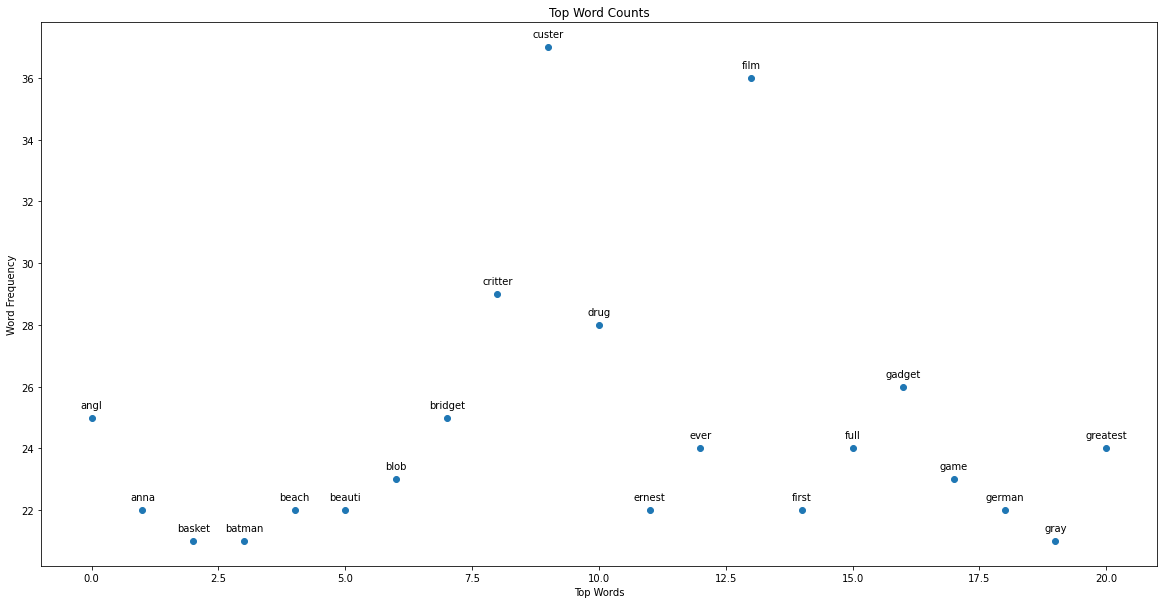

In [55]:
plot_top_words(dt_train_df,upper_threshold=10000,lower_threshold=20,count=20)

<p> <h5> Lets Look at the top words used in trainning set whose sentiment is labelled as negative </h5> </p>

Upper Limit: 10000
Lower Limit: 10
Requested Count: 30
Time Taken: 4373.273134231567 ms


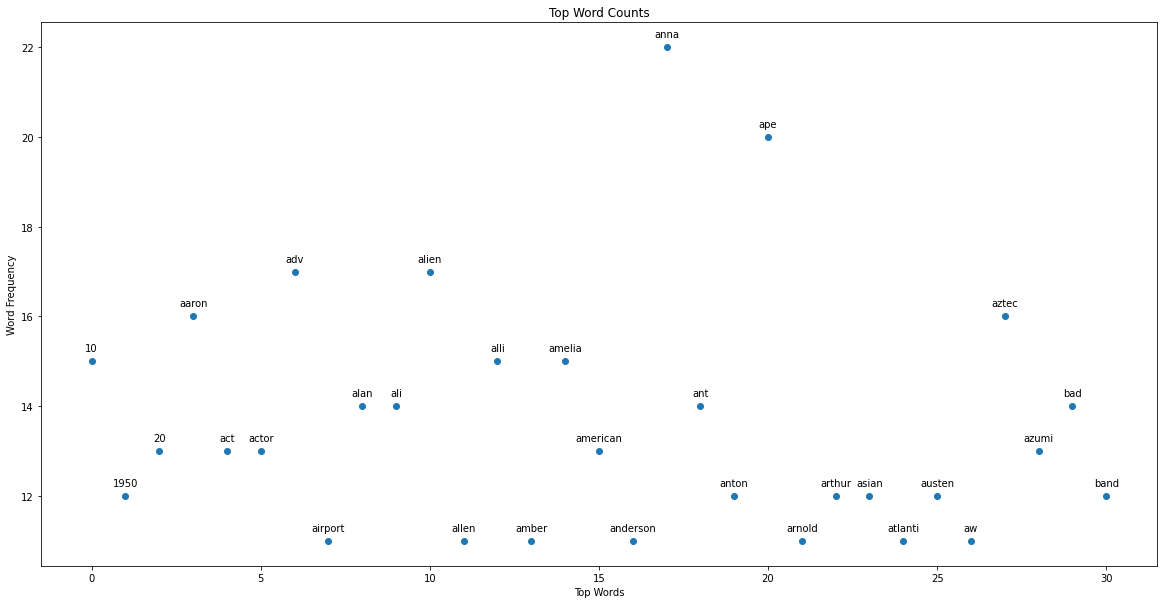

In [56]:
plot_top_words(dt_train_df[label_matrix_train==0],upper_threshold=10000,lower_threshold=10,count=30)

<p> <h5> Lets Look at the top words used in trainning set whose sentiment is labelled as negative </h5> </p>

Upper Limit: 10000
Lower Limit: 10
Requested Count: 30
Time Taken: 1525.571346282959 ms


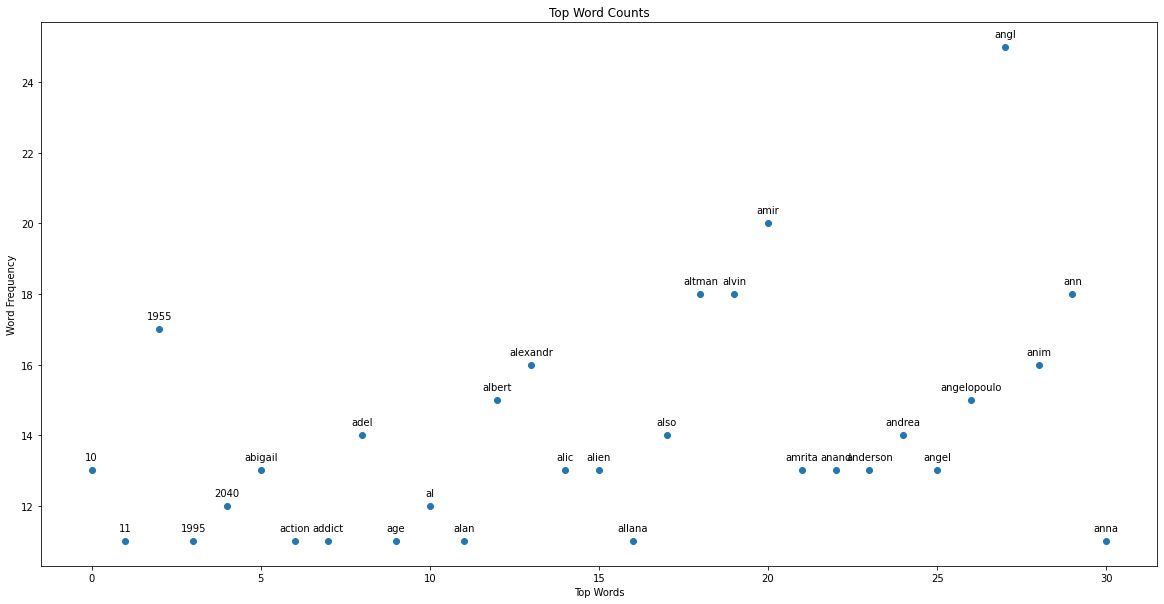

In [57]:
plot_top_words(dt_train_df[label_matrix_train==1],upper_threshold=10000,lower_threshold=10,count=30)

### Task 7: Re-weighing the document term matrix using TF-IDF Scheme

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfidf_vectorizer = TfidfVectorizer()

In [60]:
feature_matrix_train = tfidf_vectorizer.fit_transform(review_train_df["review"].tolist())

In [61]:
feature_matrix_train.shape

(40000, 118300)

In [62]:
feature_matrix_valid = tfidf_vectorizer.transform(review_valid_df["review"].tolist())

In [63]:
feature_matrix_valid.shape

(5000, 118300)

In [64]:
feature_matrix_test = tfidf_vectorizer.transform(review_test_df["review"].tolist())

In [65]:
feature_matrix_test.shape

(5000, 118300)

In [66]:
dt_train_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_train, columns = vectorizer.get_feature_names())
dt_valid_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_valid, columns = vectorizer.get_feature_names())
dt_test_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_test, columns = vectorizer.get_feature_names())

In [67]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[500:505,500:505].transpose()

,500,501,502,503,504
1897,0.0,0.0,0.0,0.0,0.0
1898,0.0,0.0,0.0,0.0,0.0
1898but,0.0,0.0,0.0,0.0,0.0
1899,0.0,0.0,0.0,0.0,0.0
18a,0.0,0.0,0.0,0.0,0.0


In [68]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[10000:10005,10000:10005].transpose()

,10000,10001,10002,10003,10004
banquo,0.0,0.0,0.0,0.0,0.0
banshe,0.0,0.0,0.0,0.0,0.0
bansih,0.0,0.0,0.0,0.0,0.0
bantam,0.0,0.0,0.0,0.0,0.0
banter,0.0,0.0,0.0,0.0,0.0


In [69]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[20000:20005,20000:20005].transpose()

,20000,20001,20002,20003,20004
chuchnov,0.0,0.0,0.000000,0.0,0.0
chuck,0.0,0.0,0.101223,0.0,0.0
chuckawalla,0.0,0.0,0.000000,0.0,0.0
chucki,0.0,0.0,0.000000,0.0,0.0
chuckie,0.0,0.0,0.000000,0.0,0.0


In [70]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[3000:34005,34000:34005].transpose()

,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,...,33995,33996,33997,33998,33999,34000,34001,34002,34003,34004
entertainmentwhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainmentwhich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainmentwhil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainmenty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p> <h5> Now time to train Machine Learning Models e </h5> </p>

### Task 8: Train and Test Machine Learning Models

<p> <h4> Classifer 1:- Naive Bayes </h4> </p>

In [84]:
tic = time.time()
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB #Gaussain assume fatures from normal distribution, Bernouli for boolean, multionomial for discreeet
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, label_matrix_train)
toc = time.time()
y_pred_nb = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_nb.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_nb.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Naive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naive Bayes Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Naive Bayes Model, Accuracy (Train Set) :  0.90355
Naive Bayes Model, Accuracy (Valid Set) :  0.8496
Time Taken: 82.9918384552002 ms


<p> <h4> Classifer 2:- Descision Tree </h4> </p>

In [86]:
tic = time.time()
#Train Descision Trees Model
#More Details: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier
maximum_tree_depth= 15
model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
model_dt.fit(feature_matrix_train,label_matrix_train)
toc = time.time()
y_pred_dt = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_dt.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_dt.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Descision Tree Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Descision Tree Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Descision Tree Model, Accuracy (Train Set) :  0.814475
Descision Tree Model, Accuracy (Valid Set) :  0.7388
Time Taken: 20926.30434036255 ms


<p> <h4> Classifer 3:- K Nearest Neighbor </h4> </p>

In [87]:
tic = time.time()
#Train K Nearest Negihbor Model
#More Details: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
#MOre Details: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 3
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
model_knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_knn = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_knn.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_knn.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("K Nearest Neighbors Model, Accuracy (Train Set) : ", accuracy_train_set)
print("K Nearest Neighbors Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

K Nearest Neighbors Model, Accuracy (Train Set) :  0.886875
K Nearest Neighbors Model, Accuracy (Valid Set) :  0.774
Time Taken: 30.000686645507812 ms


<p> <h4> Classifer 4:- Logistic Regression </h4> </p>

In [133]:
tic = time.time()
#Train Logistic Regression Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression #import model for logistic regression
l2_norm = 0.4 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=4000 #maximum number of iterations
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations) #create logistic regression model
model_lr.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_lr = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_lr.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_lr.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Logistic Regression Model, Accuracy (Train Set) :  0.947875
Logistic Regression Model, Accuracy (Valid Set) :  0.8984
Time Taken: 5396.076202392578 ms


<p> <h4> Classifer 5:- Support Vector Machine </h4> </p>

In [88]:
tic = time.time()
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2.1
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_svm = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_svm.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_svm.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Support Vector Machine Model, Accuracy (Train Set) :  0.967575
Support Vector Machine Model, Accuracy (Valid Set) :  0.9008
Time Taken: 571.570873260498 ms


<p> <h4> Classifer 6:- Bagging Classifier (Base Estimator = LinearSVC) </h4> </p>

In [90]:
tic = time.time()
#Train a MLP classifier
# Details:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifierfrom sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
 
model_bc = BaggingClassifier(base_estimator=LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations),
                             n_estimators=30, 
                             random_state=0)

model_bc.fit(feature_matrix_train,  label_matrix_train)

toc = time.time()

y_pred_stacked = model_bc.predict(feature_matrix_valid)

accuracy_train_set = model_bc.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set

accuracy_valid_set = model_bc.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set

print("Bagging Classifier ML Model, Accuracy (Train Set) : ", accuracy_train_set)

print("Bagging Classifier ML Model, Accuracy (Valid Set) : ", accuracy_valid_set)

print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Bagging Classifier ML Model, Accuracy (Train Set) :  0.96595
Bagging Classifier ML Model, Accuracy (Valid Set) :  0.8994
Time Taken: 18415.871381759644 ms


<p> 
<h4>
    Classifer 7:- Stacked ML CLassifer (Naive Bayes, K Nearest Neighbor, Support Vector Machine)
</h4>
</p>

In [136]:
tic = time.time()
#Create a stack of these estimators
estimators = [
    ("nb",model_nb), #stack naive bayes
    ("knn",model_knn), #stack K nearest neighor
    ('svm', model_svm) #stack support vector machine
]

#Train a stacked model
# Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
model_stacked = StackingClassifier(estimators=estimators, final_estimator=model_lr) #use logisitc regression as the final estimator
model_stacked.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_stacked = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_stacked.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_stacked.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Stacked ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Stacked ML Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Stacked ML Model, Accuracy (Train Set) :  0.971725
Stacked ML Model, Accuracy (Valid Set) :  0.9058
Time Taken: 149725.52800178528 ms


<p> 
<h4>
    Classifer 8:- Random Forests
</h4>
</p>

In [92]:
tic = time.time()
#Train a Random Forest model
# Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
estimators = 100
forest_depth = 25
model_rf = RandomForestClassifier(n_estimators=estimators, #The number of trees in the forest
                                  max_depth = forest_depth) #The maximum depth of the tree.
model_rf.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_stacked = model_rf.predict(feature_matrix_valid)
accuracy_train_set = model_rf.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_rf.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Random Forests ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Random Forests ML Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Random Forests ML Model, Accuracy (Train Set) :  0.934425
Random Forests ML Model, Accuracy (Valid Set) :  0.835
Time Taken: 18686.047077178955 ms


<p> 
<h4>
    Classifer 9:- AdaBoostClassifier: Descirion Tree Boost
</h4>

</p>

In [93]:
tic = time.time()
#Train a Random Forest model
# Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import AdaBoostClassifier
estimators = 100
model_abc = AdaBoostClassifier(n_estimators=estimators) #The number of trees in the forest
model_abc.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_stacked = model_abc.predict(feature_matrix_valid)
accuracy_train_set = model_abc.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_abc.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Ada Boost CLassifier ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Ada Boost CLassifier ML Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Ada Boost CLassifier ML Model, Accuracy (Train Set) :  0.8367
Ada Boost CLassifier ML Model, Accuracy (Valid Set) :  0.8268
Time Taken: 72063.66729736328 ms


<p> 
<h4>
    Classifer 10:-ExtraTreesClassifie (base: Descision Trees)
</h4>
</p>

In [94]:
tic = time.time()
#Train a Neural Network
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
estimators = 200
depth = 25
model_etc = ExtraTreesClassifier(n_estimators = estimators, max_depth = depth)
model_etc.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_stacked = model_etc.predict(feature_matrix_valid)
accuracy_train_set = model_etc.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_etc.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Extra Trees Classifer ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Extra Trees Classifer ML Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Extra Trees Classifer ML Model, Accuracy (Train Set) :  0.9543
Extra Trees Classifer ML Model, Accuracy (Valid Set) :  0.8452
Time Taken: 18171.24056816101 ms


### Task 9: Plot Evaluation Metrics for Machine Learning Models

In [95]:
from sklearn.model_selection import train_test_split #split data into train,test sets
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve,  plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from matplotlib import pyplot as plt

In [137]:
#make a list of classifers
ml_models_list = [model_nb, #Naive Bayes
                  model_dt, #Descision Trees
                 model_knn, #K nearest neighbors
                 model_lr, #Logistic Regression
                 model_svm, #Support Vector Machine
                  model_bc, #bagging classifer (base: descision tree)
                 model_stacked, #Stacked Model: NB, SVM, KNN, LR
                  model_rf, #random forestws
                  model_abc, #adaboost classifier
                  model_etc #extra trees classifier
                 ]

In [138]:
for model in ml_models_list:
    accuracy = model.score(feature_matrix_test, label_matrix_test)  #get accuracy
    y_pred = model.predict(feature_matrix_test) #get predictions
    model_name = type(model).__name__
    print("Accuracy("+ model_name + "): ", accuracy.round(4)) #display accuracy
    print("Precision("+ model_name + "): ", precision_score(label_matrix_test,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(label_matrix_test,y_pred).round(4)) #display recall
    print("\n")

Accuracy(BernoulliNB):  0.8508
Precision(BernoulliNB):  0.859
Recall(BernoulliNB):  0.8316


Accuracy(DecisionTreeClassifier):  0.7298
Precision(DecisionTreeClassifier):  0.6849
Recall(DecisionTreeClassifier):  0.8296


Accuracy(KNeighborsClassifier):  0.7692
Precision(KNeighborsClassifier):  0.7282
Recall(KNeighborsClassifier):  0.8431


Accuracy(LogisticRegression):  0.8876
Precision(LogisticRegression):  0.8748
Recall(LogisticRegression):  0.8991


Accuracy(LinearSVC):  0.8878
Precision(LinearSVC):  0.8766
Recall(LinearSVC):  0.897


Accuracy(BaggingClassifier):  0.8902
Precision(BaggingClassifier):  0.8784
Recall(BaggingClassifier):  0.9003


Accuracy(StackingClassifier):  0.8984
Precision(StackingClassifier):  0.887
Recall(StackingClassifier):  0.9081


Accuracy(RandomForestClassifier):  0.838
Precision(RandomForestClassifier):  0.8076
Recall(RandomForestClassifier):  0.8782


Accuracy(AdaBoostClassifier):  0.8208
Precision(AdaBoostClassifier):  0.7977
Recall(AdaBoostClassifier): 

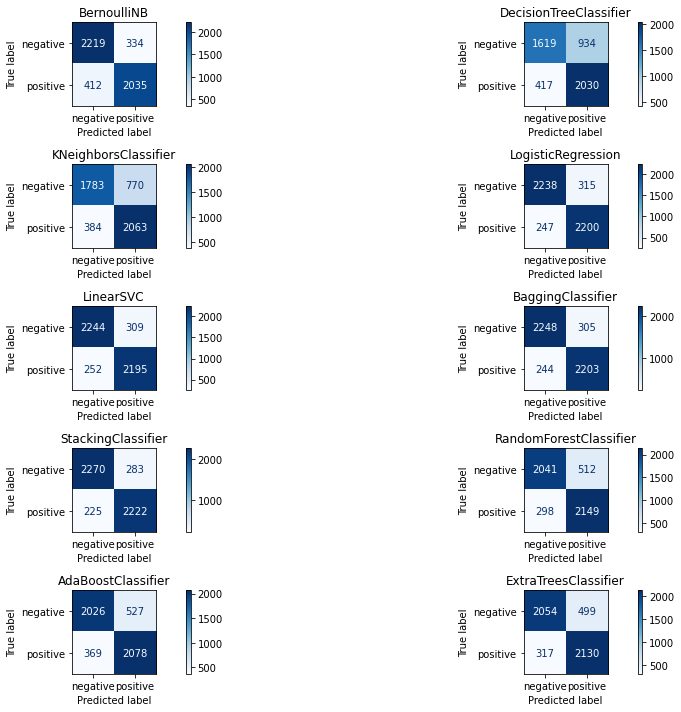

In [140]:
#Plot Confusion Matrix For all Models
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,10))

for model,ax in zip(ml_models_list, axes.flatten()):
    
    plot_confusion_matrix(model, 
                          feature_matrix_test, 
                          label_matrix_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["negative","positive"])
    
    ax.title.set_text(type(model).__name__)
plt.tight_layout()  
plt.show()

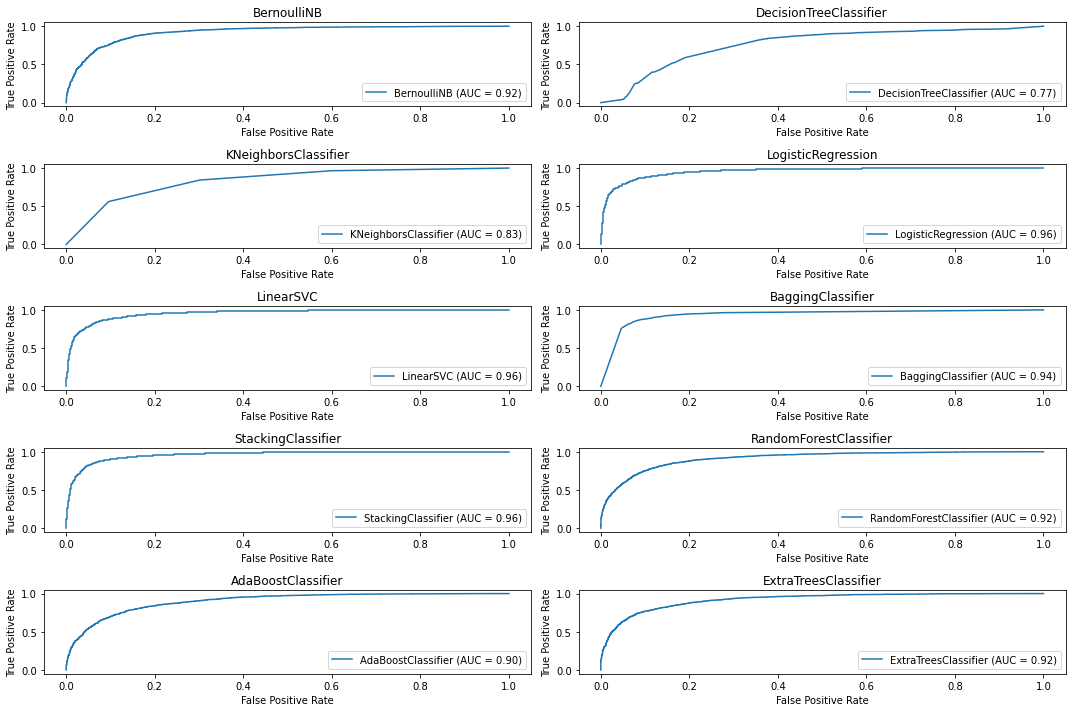

In [141]:
#Plot ROC Curve For all Models
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_roc_curve(model,feature_matrix_test,label_matrix_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  
plt.show()

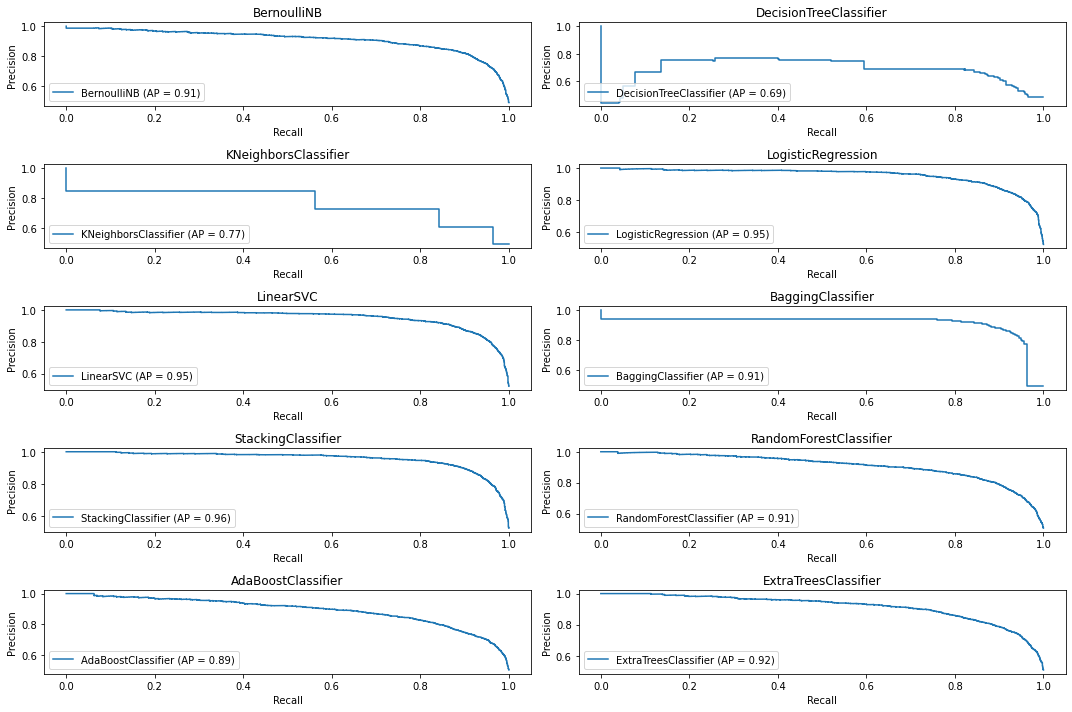

In [142]:
#Plot Precision Recall CUrve FOr ALl Models
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_precision_recall_curve(model,feature_matrix_test,label_matrix_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  
plt.show()

### Task 10: Summarize Performace of Machine Learning Models

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy on Train Set</th>
        <th>Accuracy on Test Set</th>
        <th>Precision on Test Set</th>
        <th>Recall on Test Set</th>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.9032</td>
        <td>0.8471</td>
        <td>0.8679</td>
        <td>0.8163</td>
    </tr>
    <tr>
        <td>Descision Trees</td>
        <td>0.8133</td>
        <td>0.7319</td>
        <td>0.6933</td>
        <td>0.8250</td>         
    </tr>
    <tr>
        <td>K Nearest Neighbors</td>
        <td>0.8847</td>
        <td>0.7696</td>
        <td>0.7359</td>
        <td>0.8361</td>  
    </tr> 
    <tr>
        <td>Logistic Regression</td>
        <td>0.9479</td>
        <td>0.8889</td>
        <td>0.8842</td>
        <td>0.8933</td>        
    </tr>    
    <tr>
        <td>Support Vector Machine</td>
        <td>0.9686</td>
        <td>0.8914</td>
        <td>0.8869</td>
        <td>0.8955</td>        
    </tr>
    <tr>
        <td>Stacking(NB, SVM, LR)</td>
        <td>0.97275</td>
        <td>0.9001</td>
        <td>0.9004</td>
        <td>0.8981</td>        
    </tr> 
</table>

### Task 11: Movie Rating Generator

In [239]:
def generate_rating(ml_models,movie_review,preprocessed=False):
    
    processed_text = ""
    
    if not preprocessed:
        #pre process review
        processed_text = [process_string(movie_review)]

        print("PreProcessed Review: ")
        print(processed_text)
        print("")
        #make sure the text in string
        #processed_text = [str(processed_text)]
    else:
        processed_text = [movie_review]
    
    #generate feature matrix for the review using TF-IDF Scheme
    feature_matrix = tfidf_vectorizer.transform(processed_text)
    
    #container to store predictions
    predictions = []
    
    #get predictions from all 10 classifiers
    for model in ml_models:
        
        #get prediction from
        predictions.append(model.predict(feature_matrix))
    
    #convert predictions from llist to numpy array
    predictions = np.array(predictions)
    
    print("Predictions By Classifiers: ")
    print(predictions)
    
    
    #sum predictions from all models to get rating
    rating = np.sum(predictions)
    print("")
    print("Movie Rating(0-10): " + str(rating))

In [240]:
review_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 11841 to 23333
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [243]:
r_num = 50
review_test_df.iloc[r_num]

review       note saw approxim last half movi feel free tak...
sentiment                                             negative
Name: 1984, dtype: object

In [244]:
#web: https://www.imdb.com/title/tt1635327/reviews?ref_=tt_urv
custom_review1 = """I've enjoyed the NC series for a long time but since 2~3 years ago it started getting really annoying and unfunny. I'm not sure why, if it was because the viewers were decreasing or less income, but he started doing the same others do, even with empty jokes about minorities (that felt like it was being done just to be seen as "edgy" and not because he actually felt it was funny).
He has not been doing real reviews, but either parodies or just openly mocking a movie while something happens in the story of his character. The channel and staff being surrounded by drama doesn't help the image of the series either. If I could rate it for just what it was until 2012~13 it would have a better rating.
"""
custom_review1

'I\'ve enjoyed the NC series for a long time but since 2~3 years ago it started getting really annoying and unfunny. I\'m not sure why, if it was because the viewers were decreasing or less income, but he started doing the same others do, even with empty jokes about minorities (that felt like it was being done just to be seen as "edgy" and not because he actually felt it was funny).\nHe has not been doing real reviews, but either parodies or just openly mocking a movie while something happens in the story of his character. The channel and staff being surrounded by drama doesn\'t help the image of the series either. If I could rate it for just what it was until 2012~13 it would have a better rating.\n'

In [245]:
generate_rating(ml_models_list,custom_review1)

PreProcessed Review: 
["i'v enjoy nc seri long time sinc 2 3 year ago start get realli annoy unfunni i'm sure viewer decreas less incom start other even empti joke minor felt like done seen edgi actual felt funni real review either parodi openli mock movi someth happen stori charact channel staff surround drama help imag seri either could rate 2012 13 would better rate"]

Predictions By Classifiers: 
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Movie Rating(0-10): 2


In [246]:
#web: https://www.imdb.com/title/tt1635327/reviews?ref_=tt_urv
custom_review2 = """The nostalgia critic is a 20 year old comedic reviewer who reviews movies from his childhood. All of the movies he reviews are movies from the 80s and 90s. Most of the movies he reviews are considered bad movies, such as Batman And Robin, Super Mario Bros and so forth. He reviews his movies while making fun of completely stupid points of the movie or plot holes. One could argue that the nostalgia critic is more of a comedian then he is a movie critic. Either way, he's hilarious to watch.

His humor consist of making tons of pop culture references and going over the top in his acting like a Looney Toons character. He's an extremely passionate movie lover who has fun all the way in his entertaining acting. Those who love movies will love seeing the Nostalgia Critic lampoon horrible films of the past.

On average, each review is approximately 20 minutes long, and walks through the movie explaining what happens so you get the grasp of the movie along with his jokes.

He has a number of episodes called "old Vs new" which he compares an old movie with a recent remake. For example, he compared the Old King Kong with the new Peter Jackson King Kong. He also has "top 11" videos, which is when he ranks shows or movies in a certain category. He made a video listing "top 11 scariest nostalgia moments", "top 11 nostalgia shows", "top 11 saddest nostalgia moments" and more.

The nostalgia critic is played by Doug Walker, who you can tell really admires and loves movies. Not only is he funny, but he also has a passion for analyzing what's good about movies and what's bad. This is shown in his Top 11 videos, Old Vs New and none nostalgia critic videos that are posted on the site (ThatGuyWithTheGlasses.com).

What makes the nostalgia critic very recomendable is how he explores childhood movies. The closer your age is to him, the more you will recognize the movies and shows he reviews. This is especially true when he makes tributes to nostalgic TV shows. It's a nice way to revisit your childhood, hence his title, "nostalgia". We all have movies that we love due the the nostalgic value it created when we watched it as a child. You'd think that the nostalgia critic would crush those memories as he rips apart movies he reviews, but trust me when I say it isn't so. Seeing the nostalgia critic tear apart your childhood films should only make you love the film even more, because you would spend 20 minutes looking at the film as an adult, defining an even bigger line of what's a childhood treasure."""
custom_review2

'The nostalgia critic is a 20 year old comedic reviewer who reviews movies from his childhood. All of the movies he reviews are movies from the 80s and 90s. Most of the movies he reviews are considered bad movies, such as Batman And Robin, Super Mario Bros and so forth. He reviews his movies while making fun of completely stupid points of the movie or plot holes. One could argue that the nostalgia critic is more of a comedian then he is a movie critic. Either way, he\'s hilarious to watch.\n\nHis humor consist of making tons of pop culture references and going over the top in his acting like a Looney Toons character. He\'s an extremely passionate movie lover who has fun all the way in his entertaining acting. Those who love movies will love seeing the Nostalgia Critic lampoon horrible films of the past.\n\nOn average, each review is approximately 20 minutes long, and walks through the movie explaining what happens so you get the grasp of the movie along with his jokes.\n\nHe has a numb

In [247]:
generate_rating(ml_models_list,custom_review2)

PreProcessed Review: 
["nostalgia critic 20 year old comed review review movi childhood movi review movi 80 90 movi review consid bad movi batman robin super mario bro forth review movi make fun complet stupid point movi plot hole one could argu nostalgia critic comedian movi critic either way he' hilari watch humor consist make ton pop cultur refer go top act like looney toon charact he' extrem passion movi lover fun way entertain act love movi love see nostalgia critic lampoon horribl film past averag review approxim 20 minut long walk movi explain happen get grasp movi along joke number episod call old vs new compar old movi recent remak exampl compar old king kong new peter jackson king kong also top 11 video rank show movi certain categori made video list top 11 scariest nostalgia moment top 11 nostalgia show top 11 saddest nostalgia moment nostalgia critic play doug walker tell realli admir love movi funni also passion analyz what' good movi what' bad shown top 11 video old vs ne

In [248]:
custom_review3 = """I love his old videos, but his over reliance on skits (which are 90% of the time TERRIBLE), really bring the show down in quality. I love the commercial reviews though. They are 🔥🔥🔥. The recreation "reviews" are atrocious though, and miss the point of using clips from the movies, and allow for him to create strawman arguments.

Overall, Doug needs to get his act together and listen to people. Otherwise I don't see much of a future for him and the show."""
custom_review3

'I love his old videos, but his over reliance on skits (which are 90% of the time TERRIBLE), really bring the show down in quality. I love the commercial reviews though. They are 🔥🔥🔥. The recreation "reviews" are atrocious though, and miss the point of using clips from the movies, and allow for him to create strawman arguments.\n\nOverall, Doug needs to get his act together and listen to people. Otherwise I don\'t see much of a future for him and the show.'

In [249]:
generate_rating(ml_models_list,custom_review3)

PreProcessed Review: 
['love old video relianc skit 90 time terribl realli bring show qualiti love commerci review though 🔥 🔥 🔥 recreat review atroci though miss point use clip movi allow creat strawman argument overal doug need get act togeth listen peopl otherwis see much futur show']

Predictions By Classifiers: 
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]

Movie Rating(0-10): 6


In [250]:
custom_review4 = """THis movie was fantanstic, brillaint, awesome for some parts of it but 
then horrible terrible loathsome for other parts of it. I dont know how i feel about this movie.
Guess i dont care."""

In [251]:
generate_rating(ml_models_list,custom_review4)

PreProcessed Review: 
['movi fantanst brillaint awesom part horribl terribl loathsom part dont know feel movi guess dont care']

Predictions By Classifiers: 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Movie Rating(0-10): 0


In [252]:
custom_review5 = """THis movie was fantanstic, brillaint, awesome for some parts of it"""

In [253]:
generate_rating(ml_models_list,custom_review5)

PreProcessed Review: 
['movi fantanst brillaint awesom part']

Predictions By Classifiers: 
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]

Movie Rating(0-10): 9


In [254]:
custom_review6 = """but then horrible terrible loathsome for other parts of it."""

In [255]:
generate_rating(ml_models_list,custom_review6)

PreProcessed Review: 
['horribl terribl loathsom part']

Predictions By Classifiers: 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Movie Rating(0-10): 0


In [258]:
custom_review7 = """I dont know how i feel about this movie.
Guess i dont care.
"""
custom_review7

'I dont know how i feel about this movie.\nGuess i dont care.\n'

In [259]:
generate_rating(ml_models_list,custom_review7)

PreProcessed Review: 
['dont know feel movi guess dont care']

Predictions By Classifiers: 
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]

Movie Rating(0-10): 4


In [267]:
custom_review8 = """I dont know how i feel about this movie. Guess i dont care www.imdb.com"""
custom_review8

'I dont know how i feel about this movie. Guess i dont care www.imdb.com'

In [269]:
generate_rating(ml_models_list,custom_review8)

PreProcessed Review: 
['dont know feel movi guess dont care wwwimdbcom']

Predictions By Classifiers: 
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]

Movie Rating(0-10): 4


In [270]:
custom_review9 = """I dont know how i feel about this movie. Guess i dont care https://www.imdb.com/title/tt1635327/reviews?ref_=tt_urv"""
custom_review9

'I dont know how i feel about this movie. Guess i dont care https://www.imdb.com/title/tt1635327/reviews?ref_=tt_urv'

In [272]:
generate_rating(ml_models_list,custom_review8)

PreProcessed Review: 
['dont know feel movi guess dont care wwwimdbcom']

Predictions By Classifiers: 
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]

Movie Rating(0-10): 4
